In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
train=pd.read_csv('titanic_train.csv')

In [53]:
train.head()
#0-dead
#1-alive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
#To check amount of missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

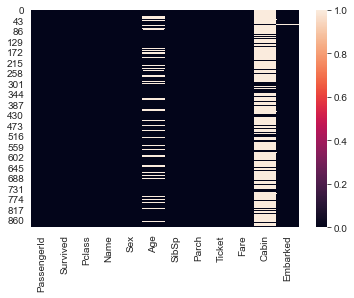

In [55]:
sns.heatmap(train.isnull())
#The graph indicates missing Age and Cabin information the most

<AxesSubplot:xlabel='Survived', ylabel='count'>

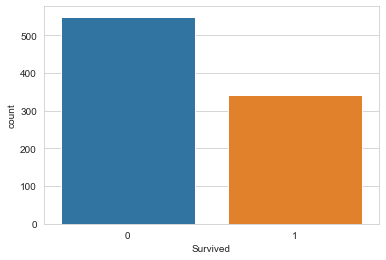

In [56]:
#Count for dead vs survive
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

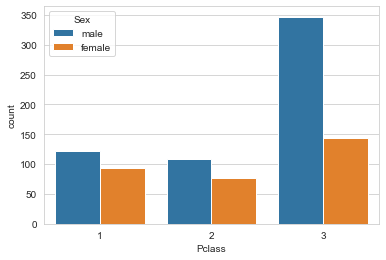

In [57]:
#Distribution of class with respect to Sex

sns.countplot(x='Pclass', hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

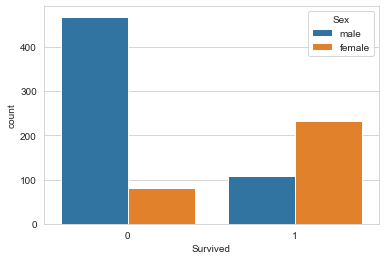

In [58]:
#Death of more female or male
sns.countplot(x='Survived', hue='Sex',data=train)

#Less female Died, No. of female survived is almost more than twice of that of male

<AxesSubplot:xlabel='Survived', ylabel='count'>

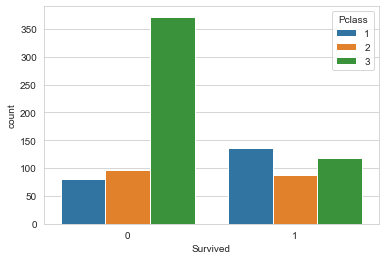

In [59]:
#Death vs Survived bar chart among passenger class

sns.countplot(x='Survived', hue='Pclass',data=train)

#Class 3 passengers died more comapared to class 1 and 2 which is almost similar
#For Class 1, more passenger survived than died

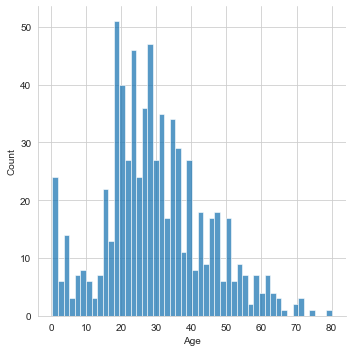

In [60]:
sns.displot(train['Age'],bins=50)
#Mostly Pasengers aged between 20 to 40 were in the deck
#Panssengers below 10, being the 2nd most to cover 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

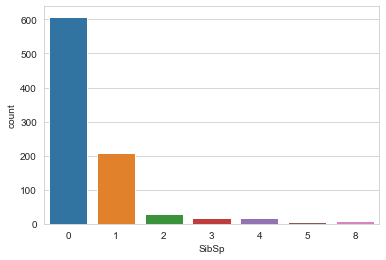

In [61]:
sns.countplot(x='SibSp',data=train)
#Around 600 passengers have no dependents, 200 have 1 dependent



<AxesSubplot:xlabel='SibSp', ylabel='count'>

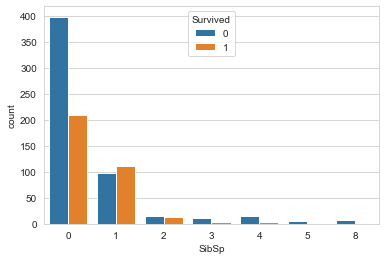

In [62]:
sns.countplot(x='SibSp',hue='Survived',data=train)

#Passengers having 5 or more dependents, all servived

In [63]:
import cufflinks as cf
cf.go_offline()

In [64]:
train['Sex'].iplot(kind='hist',bins=30,color='orange')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

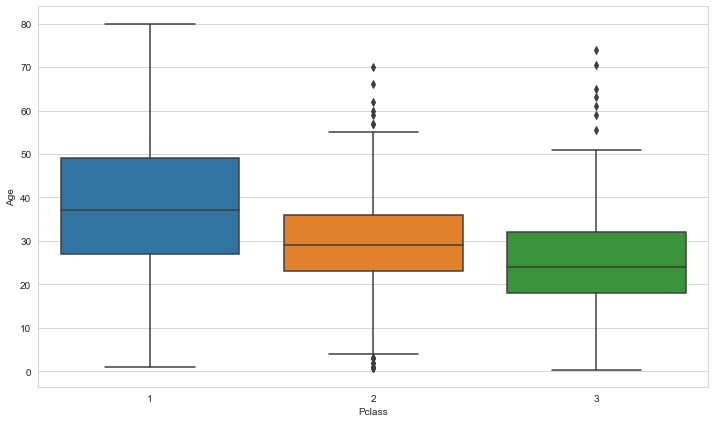

In [65]:
# Data Cleaning
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

#We can conclude Class 1 has People aged older than Class 2 and 3

In [66]:
#Filling null age with Average value based on class
def compute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [67]:
train['Age']=train[['Age','Pclass']].apply(compute,axis=1)

<AxesSubplot:>

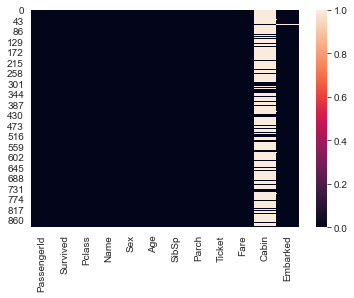

In [68]:
sns.heatmap(train.isnull())

In [69]:
#Droping Column 
#'Cabin' column will be dropped as it has more null values, filling up can lead to something unnatural 

train.drop('Cabin',axis=1, inplace=True)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

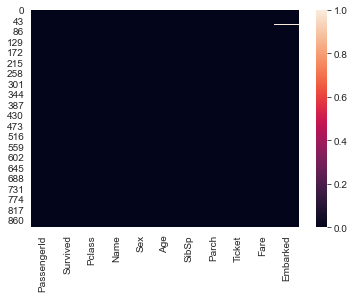

In [71]:
sns.heatmap(train.isnull())

<AxesSubplot:>

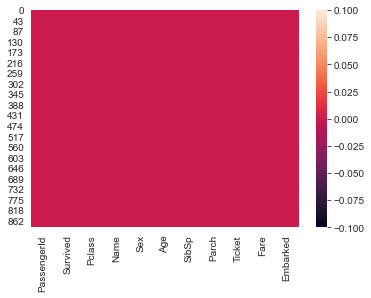

In [72]:
train.dropna(inplace=True)
sns.heatmap(train.isnull())

In [73]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [74]:

embark = pd.get_dummies(train['Embarked'])
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [75]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [76]:
train = pd.concat([train,sex,embark],axis=1)

In [77]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [78]:
#=train.drop('Survived',axis=1)
#Y=train['Survived']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [91]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [92]:
prediction=logmodel.predict(X_test)

In [93]:
from sklearn.metrics import classification_report


In [94]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.64      0.72       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[147,  16],
       [ 37,  67]], dtype=int64)